<img alt="Colaboratory logo" width="25%" src="https://github.com/marcelomonier/airbnb_project/blob/main/logo_moment.png?raw=true">



---

# Análise dos Dados do Airbnb - *Toronto, Ontario, Canada*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Toronto, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [1]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/canada/on/toronto/2022-01-06/visualisations/listings.csv')

## Análise dos Dados


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião.
* `availability_365` - número de dias de disponibilidade dentro de 365 dias.
* `number_of_reviews_ltm` - número total de avaliações.
* `license` - Número da apólice do imóvel (esta coluna possue mais de 66% dos seus valores nulos).

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [3]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,1419,Beautiful home in amazing area!,1565,Alexandra,NaN,Little Portugal,43.64590,-79.42423,Entire home/apt,469,28,7,2017-12-04,0.09,1,0,0,NaN
1,8077,Downtown Harbourfront Private Room,22795,Kathie & Larry,NaN,Waterfront Communities-The Island,43.64080,-79.37673,Private room,96,180,169,2013-08-27,1.12,2,365,0,NaN
2,23691,Queen Bedroom close to downtown,93825,Yohan & Sarah,NaN,Briar Hill-Belgravia,43.69805,-79.45411,Private room,72,28,217,2019-12-22,1.54,2,365,0,NaN
3,27423,Executive Studio Unit- Ideal for One Person,118124,Brent,NaN,South Riverdale,43.66884,-79.32725,Entire home/apt,45,365,26,2011-08-30,0.18,1,312,0,NaN
4,30931,Downtown Toronto - Waterview Condo,22795,Kathie & Larry,NaN,Waterfront Communities-The Island,43.64015,-79.37625,Entire home/apt,128,180,1,2010-08-11,0.01,2,365,0,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

O *dataset* em comento é uma versão resumida do Airbnb da cidade de Toronto, Canadá. A versão completa você popde encontrar [neste link](http://data.insideairbnb.com/canada/on/toronto/2022-01-06/data/listings.csv.gz).

In [4]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
df.head()

# df.info()

Entradas:	 15435
Variáveis:	 18



,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,1419,Beautiful home in amazing area!,1565,Alexandra,NaN,Little Portugal,43.64590,-79.42423,Entire home/apt,469,28,7,2017-12-04,0.09,1,0,0,NaN
1,8077,Downtown Harbourfront Private Room,22795,Kathie & Larry,NaN,Waterfront Communities-The Island,43.64080,-79.37673,Private room,96,180,169,2013-08-27,1.12,2,365,0,NaN
2,23691,Queen Bedroom close to downtown,93825,Yohan & Sarah,NaN,Briar Hill-Belgravia,43.69805,-79.45411,Private room,72,28,217,2019-12-22,1.54,2,365,0,NaN
3,27423,Executive Studio Unit- Ideal for One Person,118124,Brent,NaN,South Riverdale,43.66884,-79.32725,Entire home/apt,45,365,26,2011-08-30,0.18,1,312,0,NaN
4,30931,Downtown Toronto - Waterview Condo,22795,Kathie & Larry,NaN,Waterfront Communities-The Island,43.64015,-79.37625,Entire home/apt,128,180,1,2010-08-11,0.01,2,365,0,NaN


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

* É possível ver que a coluna `neighbourhood_group` possue 100% dos seus valores faltantes;
* A variável `license`possui mais da metade de seus valores nulos.
* As variáveis `reviews_per_month` e `last_review`possuem 22% dos seus valores nulos;
*Por fim, as varáveis `host_name`e `name` possuem menos de 0,1% dos seus valores nulos.

In [5]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
license                           0.665565
reviews_per_month                 0.225786
last_review                       0.225786
host_name                         0.001231
name                              0.000065
number_of_reviews                 0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
id                                0.000000
minimum_nights                    0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

A fim de identificar a distribuição das variáveis, será plotado o histograma do DataFrame

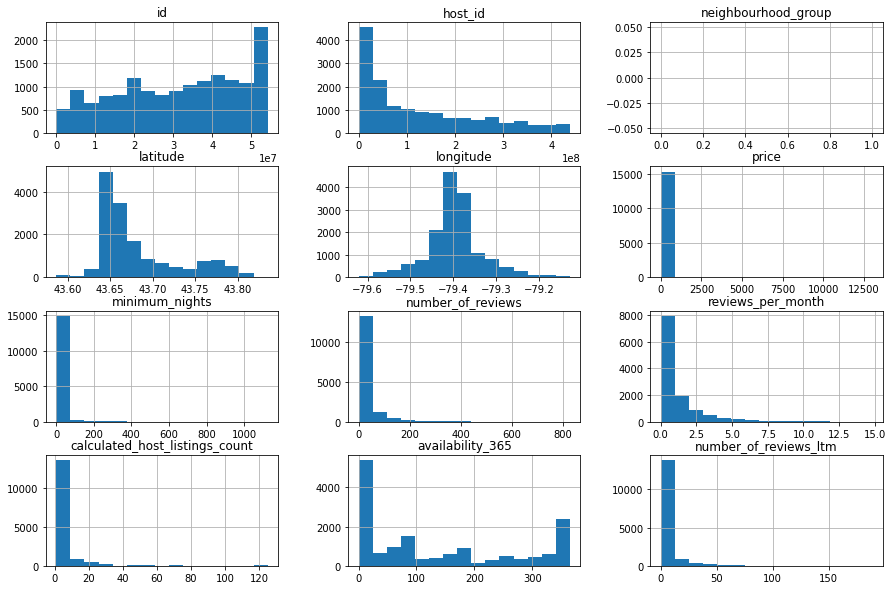

In [6]:
# plotar o histograma das variáveis numéricas

df.hist(bins=15, figsize=(15, 10));

A partir da exposição do histograma é possível observar a presença de outliers. Sendo assim, a análise do DataFrame se torna mais complexa, pois a saída de alguns comandos pode ser divergente da realidade.

### **Q4. Qual a média dos preços de aluguel?**

In [7]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,15435.000000,15435.000000,15435.000000,11950.000000,15435.000000,15435.00000
mean,154.569874,26.163719,25.971429,1.089892,5.490444,134.76793
std,390.696169,39.464154,53.346580,1.530461,13.771115,136.71599
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.00000
25%,67.000000,5.000000,1.000000,0.150000,1.000000,0.00000
50%,100.000000,28.000000,5.000000,0.490000,1.000000,88.00000
75%,160.000000,28.000000,26.000000,1.370000,4.000000,260.00000
max,13000.000000,1125.000000,828.000000,14.810000,125.000000,365.00000


É possível verificar o resumo estatísco acima, algumas hipóteses, tais como: 

* A variável `price` possui 75% do valor abaixo de 160, porém seu valor máximo é 13000.
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano.

Um outro ponto é a quantidade mínima de noites, pois causa ruído no valor médio de preço do imóvel. É possível observar alguns *outliers* no resumo estatísco em comento.

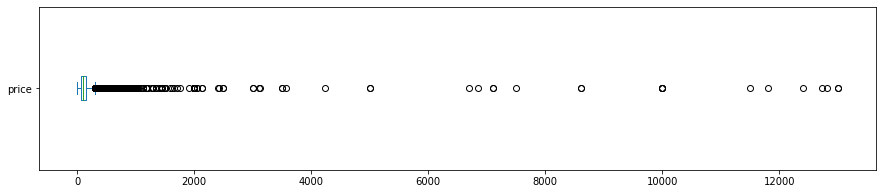


 price: valores acima de 1500
71 entradas
0.4600%


In [8]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 1500 para price
print("\n price: valores acima de 1500")
print("{} entradas".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))

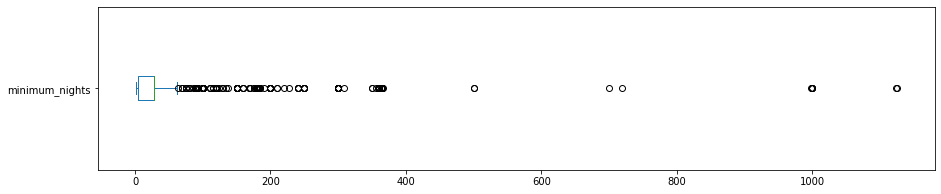

minimum_nights: valores acima de 30 dias:
717 entradas
4.6453%


In [9]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30 dias:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

Depois da análise feita acima, observou-se que é necessário excluir os *outliers*. Sendo assim, após a exclusão dos mesmos é possível ter um valor com uma acurácia maior, ou seja, um valor que se aproxima do valor real.

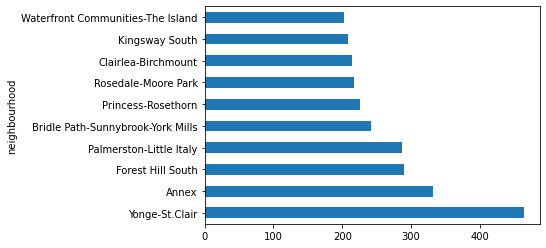

In [10]:
df.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10].plot(kind='barh');

Com o gráfico de barras é possível perceber os bairros com a média de preço maior. O gráfico acima nos permite visualizar, em relação a média de preço, 10 bairros de forma decrescente.

### **Q5. Qual a correlação existente entre as variáveis**

In [11]:
# criar uma matriz de correlação

corr = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()



# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.019337,-0.015395,-0.012970,-0.004975,0.026510
minimum_nights,0.019337,1.000000,-0.085356,-0.196995,-0.018478,0.036522
number_of_reviews,-0.015395,-0.085356,1.000000,0.611145,-0.071129,0.006055
reviews_per_month,-0.012970,-0.196995,0.611145,1.000000,-0.046329,0.059426
calculated_host_listings_count,-0.004975,-0.018478,-0.071129,-0.046329,1.000000,0.143337
availability_365,0.026510,0.036522,0.006055,0.059426,0.143337,1.000000


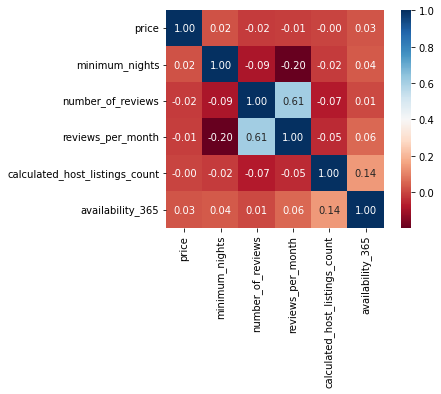

In [12]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**

In [13]:
# mostrar a quantidade de cada tipo de imóvel disponível
df['room_type'].value_counts()

Entire home/apt    10202
Private room        5001
Shared room          215
Hotel room            17
Name: room_type, dtype: int64

In [14]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df['room_type'].value_counts() / df.shape[0]

Entire home/apt    0.660965
Private room       0.324004
Shared room        0.013929
Hotel room         0.001101
Name: room_type, dtype: float64

A saída do comando nos mostra a porcetagem dos imóveis, em que:

**66%** casa ou apartamento;

**32%** quartos individuais;

**0.1%** quartos compartilhados;

o restante dos imóveis são quartos de hotéis.


### **Q7. Qual a localidade mais cara do dataset?**



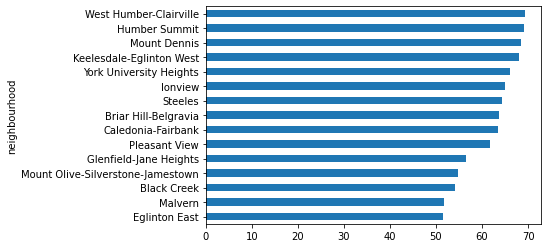

In [15]:
# ver preços por bairros, na média
df.groupby(['neighbourhood']).price.mean().sort_values()[:15].plot(kind='barh');

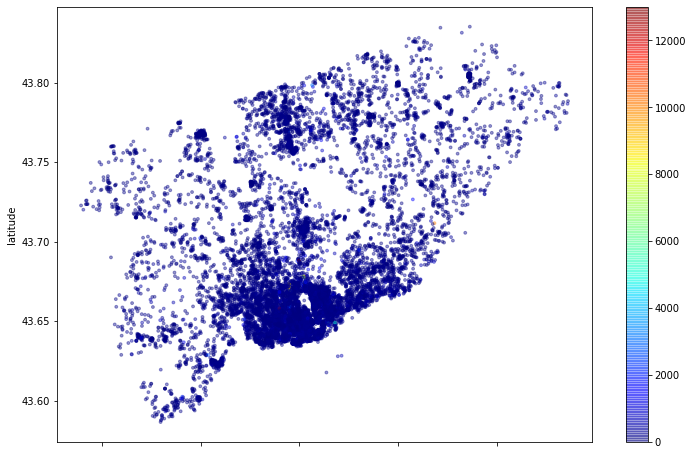

In [16]:
# plotar os imóveis pela latitude-longitude
df.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q8. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [19]:
# ver a média da coluna `minimum_nights``

df['minimum_nights'].mean()

26.16371882086168

## Conclusões


A análise realizada com esse dataset do airbnb foi superficial, pois existe outro com maior número de variáveis. Portanto, para uma análise com uma acurácia maior é necessário baixar o dataset completo.

Entretanto, mesmo com um arquivo básico é possível perceber a existencia de outliers. Para uma análise mais aprofundada, é necessário utilizar o aruivo com 106 atributos, pois só assim conseguiremos mostrar com exatidão o setor hoteleiro da cidade de Toronto - Ontario - Canadá.